In [1]:
#visualização de RMSE no jupyter
library(ggplot2)
mal=as.data.frame(read.table("IOT/0-100/grouped_mal.txt"))
kal=as.data.frame(read.table("IOT/0-100/grouped_kal.txt"))
sti=as.data.frame(read.table("IOT/0-100/grouped_sti.txt"))
spl=as.data.frame(read.table("IOT/0-100/grouped_spl.txt"))
ssa=as.data.frame(read.table("IOT/0-100/grouped_ssa.txt"))


names(mal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(kal)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(sti)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(spl)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")
names(ssa)=c("task-clock", "faults", "cs", "migrations","time", "RMSE")




func <- function(i){
    ob=c(i,i+100,i+200)
    
    return(ob)
}

#Tirando a média 
tamanhoGap= seq(1,100,1) 
mediaSpl=c()
mediaKal=c()
mediaMal=c()
mediaSti=c()
mediaSsa=c()

sdSpl=c()
sdKal=c()
sdMal=c()
sdSti=c()
sdSsa=c()

sdLacSpl=c()
sdLacKal=c()
sdLacMal=c()
sdLacSti=c()
sdLacSsa=c()

mediaLacSpl=c()
mediaLacKal=c()
mediaLacMal=c()
mediaLacSti=c()
mediaLacSsa=c()


a=c()
for(z in seq(1,100,1)){
    for (i in seq(z,9000,300)){
        a=(func(i))
#        print(a)        
        mediaLacSpl=append(mediaLacSpl, mean(spl$RMSE[a])) 
        mediaLacKal=append(mediaLacKal, mean(kal$RMSE[a])) 
        mediaLacMal=append(mediaLacMal, mean(mal$RMSE[a])) 
        mediaLacSti=append(mediaLacSti, mean(sti$RMSE[a]))
        mediaLacSsa=append(mediaLacSsa, mean(ssa$RMSE[a]))
        
        
        sdLacSpl=append(sdLacSpl, sd(spl$RMSE[a])) 
        sdLacKal=append(sdLacKal, sd(kal$RMSE[a])) 
        sdLacMal=append(sdLacMal, sd(mal$RMSE[a])) 
        sdLacSti=append(sdLacSti, sd(sti$RMSE[a])) 
        sdLacSsa=append(sdLacSsa, sd(ssa$RMSE[a])) 

    }
}


for (i in seq(1,3000,30)) {
    #calculando a média
	mediaSpl=append(mediaSpl,(mean(mediaLacSpl[i:(i+29)])))
	mediaKal=append(mediaKal,(mean(mediaLacKal[i:(i+29)])))
	mediaMal=append(mediaMal,(mean(mediaLacMal[i:(i+29)])))
	mediaSti=append(mediaSti,(mean(mediaLacSti[i:(i+29)])))
	mediaSsa=append(mediaSsa,(mean(mediaLacSsa[i:(i+29)])))

    #calculando o devio padrão
	sdSpl=append(sdSpl,(mean(sdLacSpl[i:(i+29)])))
	sdKal=append(sdKal,(mean(sdLacKal[i:(i+29)])))
	sdMal=append(sdMal,(mean(sdLacMal[i:(i+29)])))
	sdSti=append(sdSti,(mean(sdLacSti[i:(i+29)])))
	sdSsa=append(sdSsa,(mean(sdLacSsa[i:(i+29)])))

}


mediaKal=as.data.frame(mediaKal)
names(mediaKal)=c("media")
mediaKal$sd=sdKal
mediaKal$tamanho=tamanhoGap
mediaKal$algoritmo="Kalman"

mediaMal=as.data.frame(mediaMal)
names(mediaMal)=c("media")
mediaMal$sd=sdMal
mediaMal$tamanho=tamanhoGap
mediaMal$algoritmo="Moving Average"


mediaSti=as.data.frame(mediaSti)
names(mediaSti)=c("media")
mediaSti$sd=sdSti
mediaSti$tamanho=tamanhoGap
mediaSti$algoritmo="Stine"

mediaSpl=as.data.frame(mediaSpl)
names(mediaSpl)=c("media")
mediaSpl$sd=sdSpl
mediaSpl$tamanho=tamanhoGap
mediaSpl$algoritmo="Spline"

mediaSsa=as.data.frame(mediaSsa)
names(mediaSsa)=c("media")
mediaSsa$sd=sdSsa
mediaSsa$tamanho=tamanhoGap
mediaSsa$algoritmo="SSA"

todos=rbind(mediaKal,mediaMal, mediaMal, mediaSti, mediaSpl, mediaSsa)

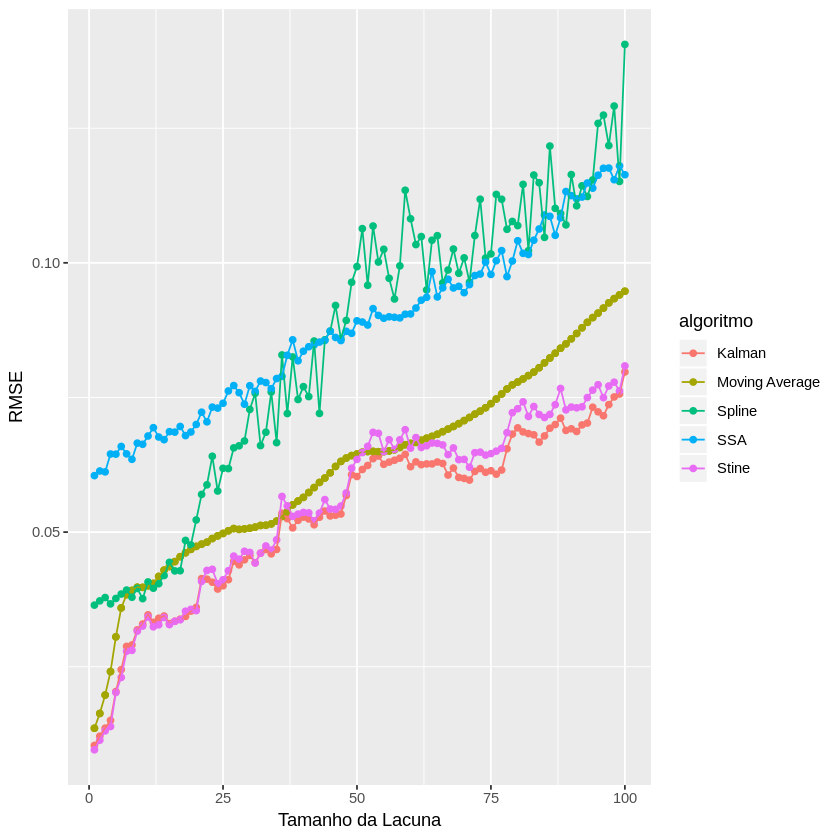

In [2]:
ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    labs(y="RMSE", x="Tamanho da Lacuna")


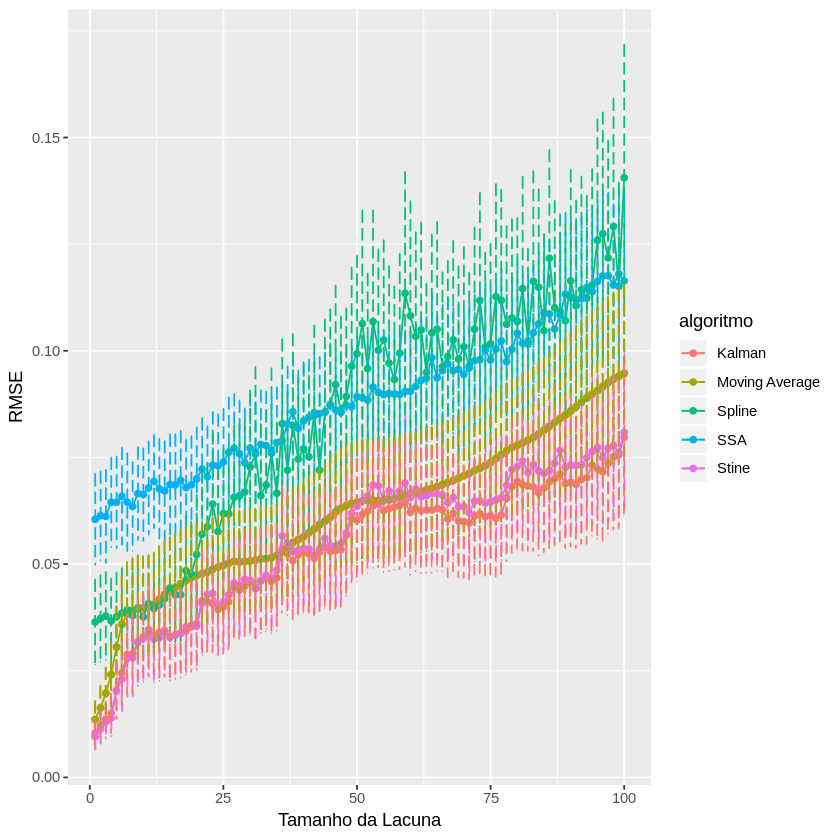

In [4]:
n=90 #tamanho da amostra. Ou seja, tem 90 lacunas de tamanho 1, 2 de tamanho 20... 90 de tamanho 100
error=qnorm(0.975)*todos$sd/sqrt(n)
todos$error=error
# The errorbars overlapped, so use position_dodge to move them horizontally
pd <- position_dodge(0.1) # move them .05 to the left and right

ggplot(todos, aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11,  position=pd) +
    labs(y="RMSE", x="Tamanho da Lacuna")


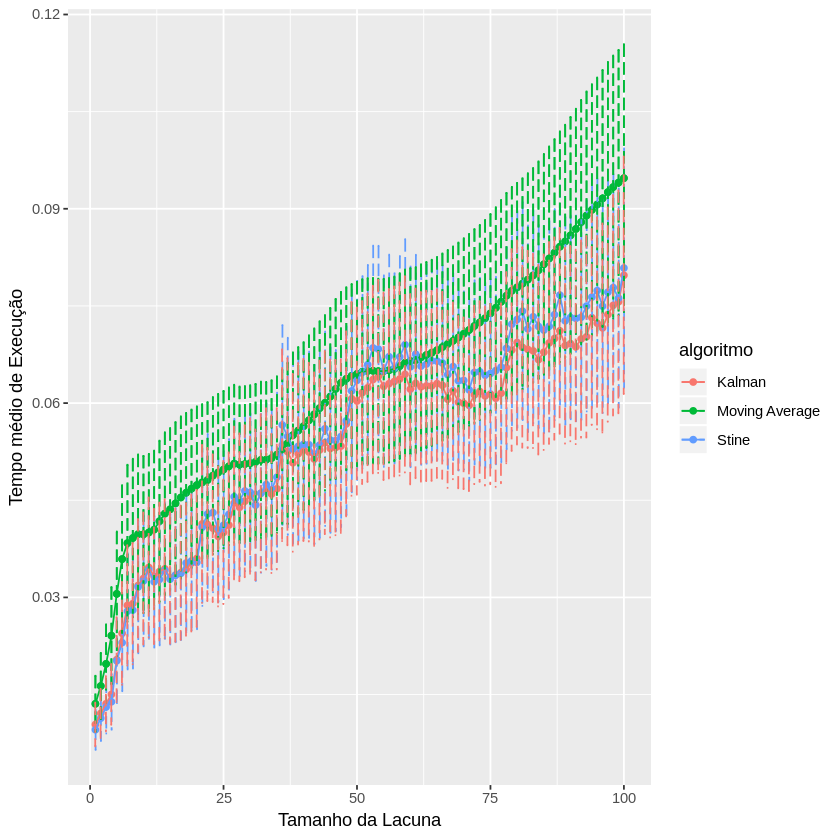

In [6]:

ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error),linetype=11,  position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


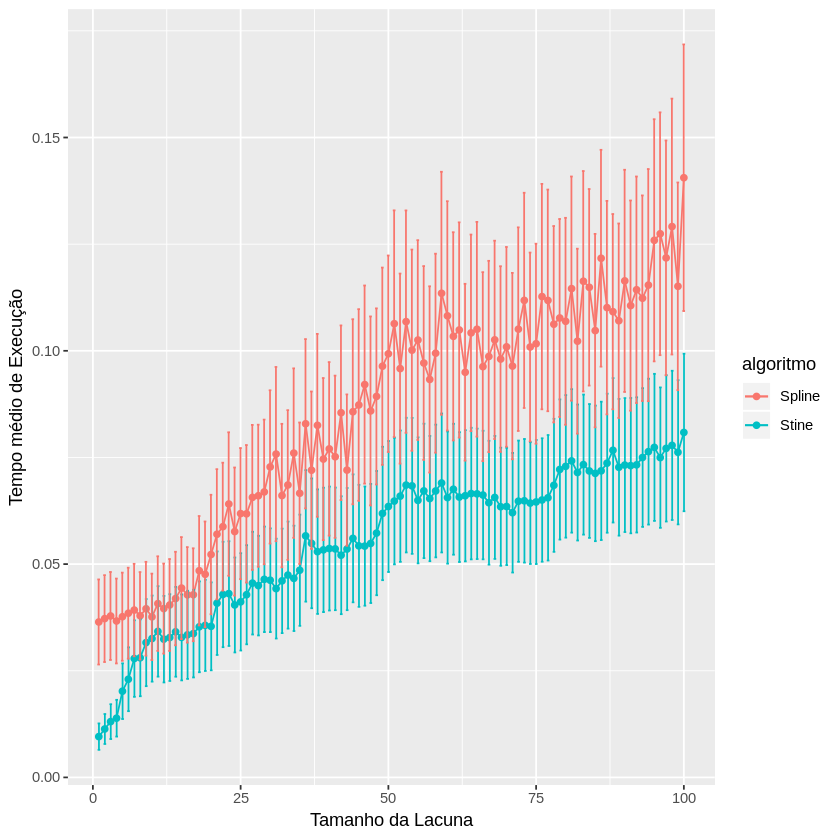

In [7]:
ggplot(todos[which(todos$algoritmo=="Stine" | todos$algoritmo=="Spline" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


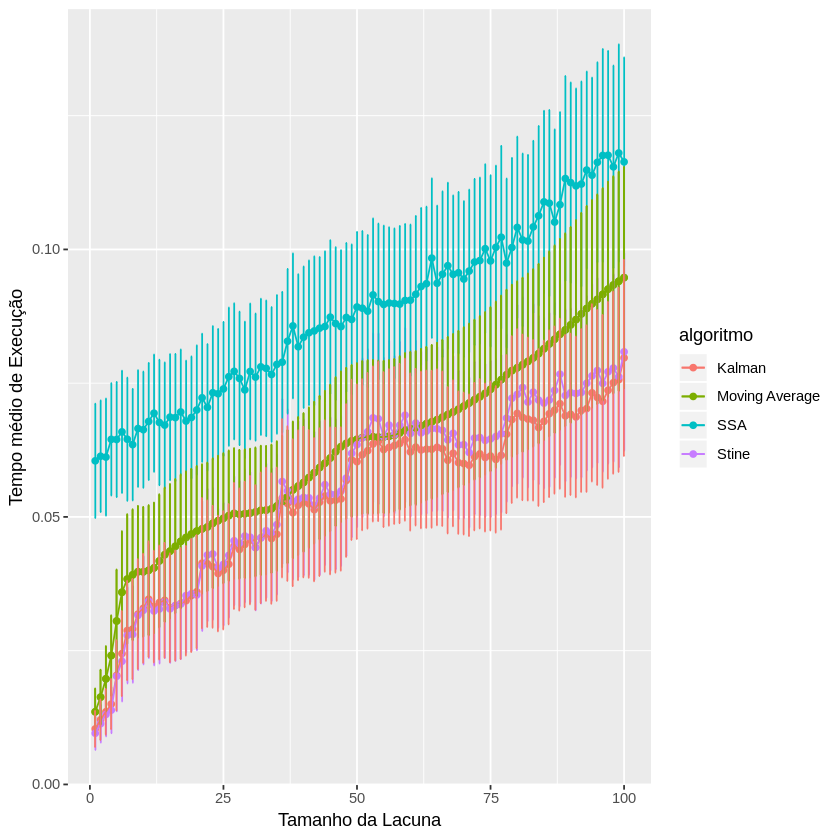

In [8]:
ggplot(todos[which(todos$algoritmo=="Kalman" | todos$algoritmo=="Stine" | todos$algoritmo=="Moving Average" | todos$algoritmo=="SSA" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


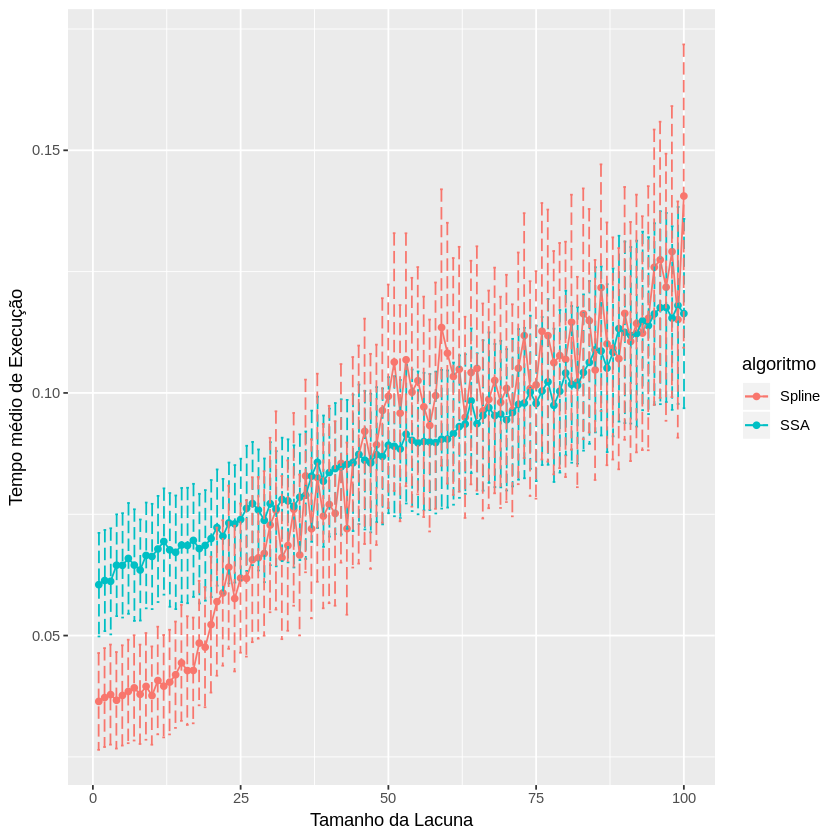

In [9]:
ggplot(todos[which(todos$algoritmo=="Spline" | todos$algoritmo=="SSA" ),], aes(x=tamanho,y=media, colour=algoritmo))+
    geom_point()+
    geom_line()+
    geom_errorbar(aes(ymin=media-error, ymax=media+error), linetype=11, position=pd) +
    labs(y="Tempo médio de Execução", x="Tamanho da Lacuna")
    


,media,sd,tamanho,algoritmo,error
401,0.03643335,0.04827571,1,Spline,0.009973682
402,0.03722636,0.04932651,2,Spline,0.010190776
403,0.03784195,0.04991341,3,Spline,0.010312027
404,0.03666510,0.04814145,4,Spline,0.009945944
405,0.03766877,0.05001113,5,Spline,0.010332216
406,0.03849048,0.05161623,6,Spline,0.010663829
407,0.03922620,0.05248390,7,Spline,0.010843087
408,0.03789717,0.04955360,8,Spline,0.010237691
409,0.03953126,0.05322252,9,Spline,0.010995685
410,0.03763556,0.04900828,10,Spline,0.010125029
